# Lab 4

# import python labs

In [1]:
import pandas
import configparser
import psycopg2

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd = config['myaws']['pwd']

conn = psycopg2.connect(  host=host,
                       user=user,
                       password = pwd,
                       dbname=db)

In [3]:
cur=conn.cursor()

# q1

In [5]:
sql_q1 = """ 
        select * from gp1.student

        """

In [6]:
df=pandas.read_sql_query(sql_q1,conn)
df[:]

,s_email,s_name,s_major
0,g2tl@dukes.jmu.edu,Tyler Gray,IA
1,d2j@dukes.jmu.edu,John Doe,Business
2,b1j@dukes.jmu.edu,Jack Brown,Health Sciences
3,jnj@dukes.jmu.edu,Ethan Jordon,Psychology
4,s10@jmu.edu,s10,ia


# q2

In [4]:
sql_q2 = """
        select gp1.professor.p_name,
        gp1.course.c_name
        from gp1.professor
        inner join gp1.course
        on gp1.professor.p_email = gp1.course.p_email
        """

In [5]:
df=pandas.read_sql_query(sql_q2,conn)
df[:]

,p_name,c_name
0,Stephen Marrin,Hypothesis Testing
1,Noel Hendrickson,Introduction to Intelligence Analysis
2,Orlandrew Danzell,Causal Analysis
3,new_p,new_c_name
4,new_p,Data Mining


# q3

In [9]:
sql_q3 = """
        select c_num,
        count(c_num) as num_enroll
        from gp1.enroll_list
        group by c_num
        """

In [10]:
df=pandas.read_sql_query(sql_q3,conn)
df[:]

,c_num,num_enroll
0,340,3
1,261,3
2,312,2
3,150,2


<AxesSubplot:xlabel='c_num'>

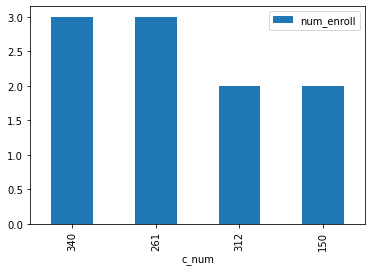

In [11]:
df.plot.bar(x='c_num',y='num_enroll')

# q4

In [12]:
sql_q4 = """
        select gp1.professor.p_name,
        count(gp1.course.c_name) as num_course
        from gp1.professor
        inner join gp1.course
        on gp1.professor.p_email = gp1.course.p_email
        group by gp1.professor.p_name
        """

In [13]:
df=pandas.read_sql_query(sql_q4,conn)
df[:]

,p_name,num_course
0,Noel Hendrickson,1
1,new_p,2
2,Stephen Marrin,1
3,Orlandrew Danzell,1


<AxesSubplot:xlabel='p_name'>

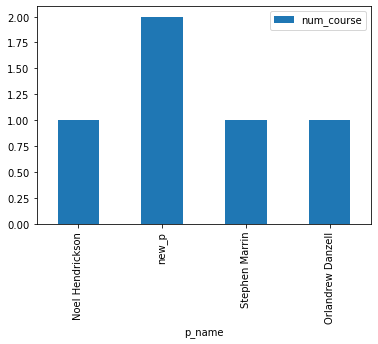

In [14]:
df.plot.bar(x='p_name',y='num_course')

# q5

In [15]:
q5_insert_professor_sql = """
            insert into gp1.professor(p_email,p_name,p_office)
            values('{}','{}','{}')
            """.format('new_lab4_email','new_p_lab4_name','new_lab4_o')
print(q5_insert_professor_sql)


            insert into gp1.professor(p_email,p_name,p_office)
            values('new_lab4_email','new_p_lab4_name','new_lab4_o')
            


In [16]:
cur.execute(q5_insert_professor_sql)

In [17]:
conn.commit()

In [18]:
df=pandas.read_sql_query('select * from gp1.professor',conn)
df[:]

,p_email,p_name,p_office
0,danzelox@jmu.edu,Orlandrew Danzell,ISAT 123
1,hendrinx@jmu.edu,Noel Hendrickson,ISAT 321
2,marrinsp@jmu.edu,Stephen Marrin,ISAT 150
3,new_p@jmu.edu,new_p,new office
4,new_lab4_email,new_p_lab4_name,new_lab4_o


In [19]:
q5_insert_course_sql = """
            insert into gp1.course(c_num,c_name,c_room,p_email)
            values('{}','{}','{}','{}')
            """.format('new_lab4_c','new_lab4_n','new_lab4_r','new_lab4_email')
print(q5_insert_course_sql)


            insert into gp1.course(c_num,c_name,c_room,p_email)
            values('new_lab4_c','new_lab4_n','new_lab4_r','new_lab4_email')
            


In [20]:
cur.execute(q5_insert_course_sql)

In [21]:
conn.commit()

In [22]:
df=pandas.read_sql_query('select * from gp1.course',conn)
df[:]

,c_num,c_name,c_room,p_email
0,261,Hypothesis Testing,123,marrinsp@jmu.edu
1,150,Introduction to Intelligence Analysis,182,hendrinx@jmu.edu
2,312,Causal Analysis,348,danzelox@jmu.edu
3,ia_new,new_c_name,online,new_p@jmu.edu
4,340,Data Mining,336,new_p@jmu.edu
5,new_lab4_c,new_lab4_n,new_lab4_r,new_lab4_email


# q6

In [23]:
q6_update_course_sql ="""
                    update gp1.course
                    set p_email = '{}'
                    where p_email ='{}'
                    """.format('new_lab4_email','t2@jmu.edu')

In [24]:
cur.execute(q6_update_course_sql)

In [25]:
conn.commit()

In [27]:
df=pandas.read_sql_query('select * from gp1.course',conn)
df[:]

,c_num,c_name,c_room,p_email
0,261,Hypothesis Testing,123,marrinsp@jmu.edu
1,150,Introduction to Intelligence Analysis,182,hendrinx@jmu.edu
2,312,Causal Analysis,348,danzelox@jmu.edu
3,ia_new,new_c_name,online,new_p@jmu.edu
4,340,Data Mining,336,new_p@jmu.edu
5,new_lab4_c,new_lab4_n,new_lab4_r,new_lab4_email


In [28]:
q6_delete_professor_sql = """
                            delete from gp1.professor
                            where p_email='{}'
                            """.format('t2@jmu.edu')

In [29]:
cur.execute(q6_delete_professor_sql)

In [30]:
conn.commit()

In [31]:
df=pandas.read_sql_query('select * from gp1.professor',conn)
df[:]

,p_email,p_name,p_office
0,danzelox@jmu.edu,Orlandrew Danzell,ISAT 123
1,hendrinx@jmu.edu,Noel Hendrickson,ISAT 321
2,marrinsp@jmu.edu,Stephen Marrin,ISAT 150
3,new_p@jmu.edu,new_p,new office
4,new_lab4_email,new_p_lab4_name,new_lab4_o


In [32]:
cur.close()

In [33]:
conn.close()